In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.tri as mtri
%matplotlib inline

In [2]:
np.random.seed(123456)

 - https://stackoverflow.com/questions/55789564/how-to-project-a-line-on-a-surfaceplot-in-python
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp2d.html#scipy.interpolate.interp2d
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Delaunay.html#scipy.spatial.Delaunay
 - https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html
 - https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.interpolate.LinearNDInterpolator.html
 - https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
 - https://stackoverflow.com/questions/27622663/interpolation-with-delaunay-triangulation
 - https://fabrizioguerrieri.com/blog/2017/9/7/surface-graphs-with-irregular-dataset
 

In [3]:
NS = 100
Sx = np.random.uniform(low=-1., high=1., size=(NS,))
Sy = np.random.uniform(low=-1., high=1., size=(NS,))
Sz = -(Sx**2 + Sy**2) + 0.1*np.random.normal(size=(NS,))

In [4]:
NP = 100
t = np.linspace(-1, 1, NP)
Px = t
Py = t**2 - 0.5
Pz = t**3 + 1

In [5]:
PSz = interpolate.LinearNDInterpolator(list(zip(Sx, Sy)), Sz)(list(zip(Px,Py)))
PSz

array([        nan,         nan,         nan,         nan, -0.90077986,
       -0.83145742, -0.76353053, -0.69699919, -0.63186339, -0.61003578,
       -0.60581626, -0.60108753, -0.57389826, -0.54387768, -0.51375288,
       -0.4945458 , -0.47721229, -0.45980839, -0.44751571, -0.44760483,
       -0.4471372 , -0.44611281, -0.44453168, -0.4423938 , -0.43969916,
       -0.43644778, -0.43263964, -0.39384363, -0.34133957, -0.28951336,
       -0.23836503, -0.18789456, -0.1847308 , -0.20390629, -0.22215805,
       -0.23948607, -0.25589036, -0.27214128, -0.29202423, -0.32663508,
       -0.38022111, -0.41806218, -0.41609069, -0.41321606, -0.40943831,
       -0.40475742, -0.3991734 , -0.39268625, -0.38529596, -0.37700255,
       -0.367806  , -0.35770633, -0.34670352, -0.33479758, -0.3219885 ,
       -0.32065431, -0.31879869, -0.31627285, -0.30273855, -0.28619212,
       -0.26918162, -0.25170706, -0.23376844, -0.21536576, -0.19649901,
       -0.28567893, -0.41664517, -0.50768169, -0.50052702, -0.49

In [6]:
tri = mtri.Triangulation(Sx, Sy)
#tri = spatial.Delaunay(list(zip(Sx, Sy)))

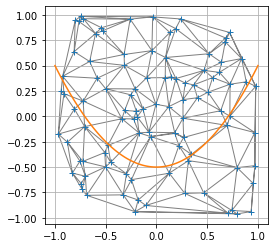

In [7]:
fig, axe = plt.subplots()
axe.plot(Sx, Sy, '+')
axe.plot(Px, Py)
axe.triplot(tri, linewidth=1, color='gray')
axe.set_aspect('equal')
axe.grid()

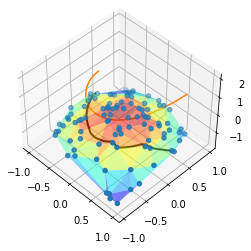

In [8]:
axe = plt.axes(projection='3d')
axe.plot_trisurf(tri, Sz, cmap='jet', alpha=0.5)
axe.plot(Px, Py, Pz)
axe.plot(Px, Py, PSz, linewidth=2, color='black')
axe.scatter(Sx, Sy, Sz)
axe.view_init(elev=45, azim=-45)